In [1]:
#Import dependencies

#Import basic modules
import numpy as np
import pandas as pd
from datetime import datetime

#Import graphing modules
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline


#Sci-Kit-Learn dependencies
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#Machine Learning/Data Mining Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#Evaluation and validation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
#Word Development Indicators dataframe

WDI_df = pd.read_csv('WDIData.csv')
WDI_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN,NaN


In [3]:
#DataFrame exploration

print(WDI_df.info())
WDI_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422136 entries, 0 to 422135
Data columns (total 64 columns):
Country Name      422136 non-null object
Country Code      422136 non-null object
Indicator Name    422136 non-null object
Indicator Code    422136 non-null object
1960              38296 non-null float64
1961              42017 non-null float64
1962              44198 non-null float64
1963              44084 non-null float64
1964              44611 non-null float64
1965              47305 non-null float64
1966              46902 non-null float64
1967              48633 non-null float64
1968              48209 non-null float64
1969              50011 non-null float64
1970              92892 non-null float64
1971              99126 non-null float64
1972              101898 non-null float64
1973              101523 non-null float64
1974              102838 non-null float64
1975              106739 non-null float64
1976              108656 non-null float64
1977              11198

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
count,3.829600e+04,4.201700e+04,4.419800e+04,4.408400e+04,4.461100e+04,4.730500e+04,4.690200e+04,4.863300e+04,4.820900e+04,5.001100e+04,...,2.358800e+05,2.263200e+05,2.277310e+05,2.229390e+05,2.277020e+05,2.217900e+05,2.129900e+05,1.866010e+05,3.024700e+04,0.0
mean,2.452211e+11,2.425950e+11,2.449366e+11,2.529916e+11,2.709654e+11,2.865474e+11,3.106604e+11,3.252888e+11,3.777535e+11,4.088952e+11,...,1.657079e+12,1.932391e+12,2.069415e+12,2.351690e+12,2.499325e+12,2.668441e+12,3.025145e+12,3.572197e+12,3.223694e+10,NaN
std,1.001513e+13,1.049264e+13,1.094735e+13,1.150925e+13,1.238989e+13,1.368799e+13,1.513324e+13,1.651773e+13,1.902679e+13,2.151339e+13,...,7.063430e+13,8.063045e+13,8.695864e+13,9.978061e+13,1.096046e+14,1.163139e+14,1.314594e+14,1.498426e+14,1.039081e+12,NaN
min,-3.344191e+14,-3.823000e+14,-4.327955e+14,-4.769875e+14,-5.339358e+14,-6.264716e+14,-7.120024e+14,-8.245134e+14,-9.379467e+14,-1.122499e+15,...,-1.827709e+14,-2.168927e+14,-3.013845e+14,-3.495617e+14,-5.189385e+14,-8.530882e+14,-1.374105e+15,-1.345846e+15,-4.386237e+01,NaN
25%,4.280341e+00,4.607864e+00,4.542384e+00,4.761900e+00,4.842686e+00,4.651163e+00,4.875091e+00,4.761900e+00,5.044458e+00,4.535321e+00,...,4.900000e+00,5.368712e+00,5.000000e+00,5.107259e+00,5.078215e+00,5.223753e+00,4.932370e+00,4.900000e+00,7.000000e+00,NaN
50%,3.556376e+01,3.697289e+01,3.598862e+01,3.553986e+01,3.660237e+01,3.863287e+01,3.981183e+01,4.136048e+01,4.220797e+01,3.932502e+01,...,4.245403e+01,4.711836e+01,4.629863e+01,4.664437e+01,4.725001e+01,4.688376e+01,4.665330e+01,4.856844e+01,3.297873e+01,NaN
75%,2.479780e+05,2.248010e+05,1.441955e+05,1.967100e+05,2.400000e+05,3.778000e+05,4.739790e+05,4.560170e+05,6.795970e+05,5.876463e+05,...,2.500000e+05,5.396312e+05,4.566098e+05,6.809700e+05,3.751433e+05,5.440110e+05,1.044740e+06,6.284045e+06,8.131200e+01,NaN
max,8.353728e+14,9.312536e+14,1.011252e+15,1.084815e+15,1.184553e+15,1.388505e+15,1.544572e+15,1.724250e+15,1.979579e+15,2.302920e+15,...,6.864133e+15,7.831726e+15,8.676844e+15,1.000180e+16,1.155185e+16,1.167182e+16,1.319219e+16,1.534503e+16,6.817944e+13,NaN


Given the structure of the data, .describe() doesn't really give relevant information

Performing a groupping  by 'Country Code' will allow to check whether there are equal amount of rows per country, in which case it is safer to assume that there are as many indicators for each of the countries.

In [4]:
WDI_df.groupby('Country Code').count()

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,1599,1599,1599,87,88,90,88,88,91,88,...,483,440,432,423,408,375,366,257,13,0
AFG,1599,1599,1599,171,185,198,200,204,217,207,...,986,1008,994,954,994,999,935,933,130,0
AGO,1599,1599,1599,135,142,148,140,131,146,141,...,1146,1115,1010,1004,1051,1004,1003,866,134,0
ALB,1599,1599,1599,105,111,116,111,111,115,109,...,1158,1168,1225,1170,1144,1134,1064,1000,144,0
AND,1599,1599,1599,11,16,18,16,16,21,16,...,235,210,210,213,245,220,207,131,13,0
ARB,1599,1599,1599,138,153,159,160,159,165,161,...,728,686,701,680,733,680,667,597,105,0
ARE,1599,1599,1599,106,120,125,120,121,121,123,...,641,673,719,705,722,683,703,574,109,0
ARG,1599,1599,1599,215,228,268,265,269,301,299,...,1190,1143,1164,1117,1139,1052,1035,811,141,0
ARM,1599,1599,1599,84,85,87,85,85,87,85,...,1259,1222,1202,1209,1178,1152,1131,1010,134,0


To verify this .unique() is applied

In [5]:
WDI_df.groupby('Country Code').count()['Indicator Name'].unique()

array([1599], dtype=int64)

The only value in this column is '1599', hence this is the number of indicators for each country.

In [6]:
WDI_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [7]:
#Save a new dataframe dropping 'Country Code' and 'Unnamed: 63'

working_df = WDI_df[(WDI_df.columns[0]+','+WDI_df.columns[2]+','+','.join(WDI_df.columns[4:-1])).split(',')]

In [8]:
#Print time it takes to complete this cell of code
#https://thispointer.com/python-how-to-get-current-date-and-time-or-timestamp/

dateTimeObj = datetime.now()
print(dateTimeObj)

countries = working_df['Country Name'].unique()

data = pd.DataFrame(columns=list(working_df['Indicator Name'].unique()))


#Process the working Data Frame by transposing it by country and have the indicators become columns and have the rows by country and year

for country in countries:

    test_df = working_df[working_df['Country Name'] == country]
    test2 = test_df[test_df.columns[1:]].T

    new_columns = list(test2.iloc[0].values)
    old_columns = test2.columns
    mapping = dict(zip(old_columns, new_columns)) 

    test2 = test2.iloc[1:]
    test2.rename(columns=mapping, inplace = True)
    
    #https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/
    
    mapping2 = dict(zip(list(test2.index), list(map(lambda item: country+"_"+str(item),list(test2.index))))) 
    mapping2

    test2.rename(index=mapping2, inplace = True)
    data = pd.concat([data,test2], sort = False)

    dateTimeObj = datetime.now()
    print(dateTimeObj)
    print(country)

dateTimeObj2 = datetime.now()    
print(dateTimeObj2)

2019-12-09 22:55:37.966509
2019-12-09 22:55:38.180687
Arab World
2019-12-09 22:55:38.256590
Caribbean small states
2019-12-09 22:55:38.322587
Central Europe and the Baltics
2019-12-09 22:55:38.389588
Early-demographic dividend
2019-12-09 22:55:38.447267
East Asia & Pacific
2019-12-09 22:55:38.525397
East Asia & Pacific (excluding high income)
2019-12-09 22:55:38.603528
East Asia & Pacific (IDA & IBRD countries)
2019-12-09 22:55:38.681659
Euro area
2019-12-09 22:55:38.761609
Europe & Central Asia
2019-12-09 22:55:38.838608
Europe & Central Asia (excluding high income)
2019-12-09 22:55:38.917608
Europe & Central Asia (IDA & IBRD countries)
2019-12-09 22:55:38.991055
European Union
2019-12-09 22:55:39.069154
Fragile and conflict affected situations
2019-12-09 22:55:39.169064
Heavily indebted poor countries (HIPC)
2019-12-09 22:55:39.263067
High income
2019-12-09 22:55:39.356031
IBRD only
2019-12-09 22:55:39.444492
IDA & IBRD total
2019-12-09 22:55:39.544014
IDA blend
2019-12-09 22:55:39.6

2019-12-09 22:56:51.014457
Peru
2019-12-09 22:56:51.826452
Philippines
2019-12-09 22:56:52.529783
Poland
2019-12-09 22:56:53.227199
Portugal
2019-12-09 22:56:53.934343
Puerto Rico
2019-12-09 22:56:54.637338
Qatar
2019-12-09 22:56:55.369756
Romania
2019-12-09 22:56:56.137695
Russian Federation
2019-12-09 22:56:56.900601
Rwanda
2019-12-09 22:56:57.706425
Samoa
2019-12-09 22:56:58.533427
San Marino
2019-12-09 22:56:59.356395
Sao Tome and Principe
2019-12-09 22:57:00.171439
Saudi Arabia
2019-12-09 22:57:00.930439
Senegal
2019-12-09 22:57:01.675437
Serbia
2019-12-09 22:57:02.493438
Seychelles
2019-12-09 22:57:03.642352
Sierra Leone
2019-12-09 22:57:04.457986
Singapore
2019-12-09 22:57:05.270477
Sint Maarten (Dutch part)
2019-12-09 22:57:06.059761
Slovak Republic
2019-12-09 22:57:06.841368
Slovenia
2019-12-09 22:57:07.622283
Solomon Islands
2019-12-09 22:57:08.414685
Somalia
2019-12-09 22:57:09.167469
South Africa
2019-12-09 22:57:09.965668
South Sudan
2019-12-09 22:57:10.949407
Spain
2019-1

In [9]:
data

,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Arab World_1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World_1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 15576 entries, Arab World_1960 to Zimbabwe_2018
Data columns (total 1599 columns):
2005 PPP conversion factor, GDP (LCU per international $)                                                                                       184 non-null object
2005 PPP conversion factor, private consumption (LCU per international $)                                                                       184 non-null object
Access to clean fuels and technologies for cooking (% of population)                                                                            3995 non-null object
Access to electricity (% of population)                                                                                                         6958 non-null object
Access to electricity, rural (% of rural population)                                                                                            6271 non-null object
Access to electricity, urban (% of urban populati

Data Frame was successfully transposed with the intended rows. This structure will be more useful for the machine learning parts of this project.

In [11]:
#Count and display the number of null values in the Data Frame
data_null = pd.DataFrame(data.isna().sum())
data_null

,0
"2005 PPP conversion factor, GDP (LCU per international $)",15392
"2005 PPP conversion factor, private consumption (LCU per international $)",15392
Access to clean fuels and technologies for cooking (% of population),11581
Access to electricity (% of population),8618
"Access to electricity, rural (% of rural population)",9305
"Access to electricity, urban (% of urban population)",8617
Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),15085
"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",15085
"Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",15085
"Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)",15085


In [12]:
data_null[0].max()

#At least one column (year) is completely empty.

15576

In order to apply machine learning, only those columns with <80% null values will be kept in the Data Frame

In [13]:
data_wo_null_columns = data[list(filter(lambda x: sum(data[x].isna())/len(data) < 0.8, data.columns))]
len(data_wo_null_columns.columns)

1044

There number of features went from 1599 to 1044 by eliminating these columns. Of course the <80% is an arbitrary criteria but does allow for establishing a code with a variable rule for dropping columns given a threshold.

As a next step, rows with null values will be dropped.

In [14]:
data_wo_null_columns.dropna(how = 'any', inplace = False)

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),...,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Women's share of population ages 15+ living with HIV (%)


This shows that in every row, there is at least one null value, even with the 'full null columns' that were previously dropped.

A new approach will be introduced by using a threshold, in which the row should have at least a given number of non-null values not to be dropped from the Data Frame.

In [15]:
threshold = 0.35
data_wo_null_columns.dropna(how = 'any', inplace = False, thresh=(1044-(threshold*1044)))

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),...,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Women's share of population ages 15+ living with HIV (%)
East Asia & Pacific (excluding high income)_1991,NaN,81.6017,77.7622,93.7392,95.0922,92.6258,97.4391,NaN,NaN,6.18612e+11,...,28.8826,4.32874,1.47895e+09,72.6379,62.2539,66.8624,26.4816,34.3785,30.874,NaN
East Asia & Pacific (excluding high income)_1992,NaN,83.8894,80.3456,94.521,94.2848,91.9763,96.4804,NaN,NaN,6.96887e+11,...,29.6838,4.22073,1.31942e+09,71.7326,61.3508,65.9655,27.3479,35.2299,31.7265,NaN
East Asia & Pacific (excluding high income)_1993,NaN,83.246,79.1646,94.5561,93.3924,91.2315,95.4464,NaN,NaN,7.64378e+11,...,30.4978,4.11576,1.42987e+09,70.6966,60.3645,64.9552,28.3634,36.213,32.7252,NaN
East Asia & Pacific (excluding high income)_1994,NaN,84.5359,81.0849,95.1208,92.4523,90.3842,94.4168,NaN,NaN,9.22501e+11,...,31.3257,4.05902,1.4934e+09,69.8357,59.5888,64.1385,29.2001,36.9823,33.5266,NaN
East Asia & Pacific (excluding high income)_1995,NaN,85.46,81.5517,95.1957,91.2816,89.4251,93.0431,NaN,2.66254e+12,1.12614e+12,...,32.1665,3.983,1.33671e+09,68.9374,58.7446,63.2693,30.0562,37.7589,34.3388,NaN
East Asia & Pacific (excluding high income)_1996,NaN,86.5758,82.9203,95.4349,90.6572,89.1614,92.0745,-12.7135,2.32404e+12,1.2848e+12,...,33.0225,3.91874,1.17482e+09,68.0397,57.9434,62.4264,30.9323,38.554,35.1697,NaN
East Asia & Pacific (excluding high income)_1997,NaN,87.7491,84.6904,96.0664,90.246,88.9817,91.442,1.33232,2.355e+12,1.33077e+12,...,33.8874,3.84591,6.93295e+09,67.1538,57.2561,61.6515,31.8152,39.2724,35.961,NaN
East Asia & Pacific (excluding high income)_1998,NaN,88.5038,84.5261,96.0052,92.3512,91.5504,93.1068,-21.507,1.84851e+12,1.20346e+12,...,34.7653,3.75811,1.45109e+10,66.5621,57.0164,61.2553,32.3791,39.4856,36.3302,NaN
East Asia & Pacific (excluding high income)_1999,NaN,89.1837,85.3034,96.1344,94.3608,93.9825,94.7168,-1.15889,1.82709e+12,1.32237e+12,...,35.6547,3.64537,1.72658e+10,65.7822,56.3985,60.5661,33.0853,39.931,36.8904,NaN
East Asia & Pacific (excluding high income)_2000,39.1937,89.7265,86.3458,96.4544,94.7173,94.3352,95.0752,-2.64388,1.77878e+12,1.44222e+12,...,36.5688,3.58332,1.76001e+10,65.0359,55.7338,59.8685,33.8166,40.6239,37.5987,NaN


With a threshold of at least 35%, less than 30% of the rows are kept. This could be one approach to be used, the other one could be to leave them as is, and imputate the values by filling the null values with a given value - for instance the mean of the column. This however is not typically recommended as this might skew the data toward these values, further more there might be features in which the mean won't make sense and a domain expert will have to make the assessment on a case by case basis.

For example, if the GDP was to be averaged, there might be a situation in which there is a missing value for a country in which by its size, the GDP will not be nearly the world's average GDP. However to treat this will be cumbersome, time consuming, and will require a domain expert. So the risk is acknowledged, and the analysis will proceed accordingly.

In [16]:
trial_df = data_wo_null_columns.fillna(data_wo_null_columns.mean())
trial_df.isna().sum().unique()

array([0], dtype=int64)

There are no null values anymore.

In [17]:
data_wo_nulls = trial_df

The next step is to incorporate the Human Development Index by country and year into the DataFrame. The operation should be actually performed on the full Data Frame (data) since the HDI data only encompasses years 1990 onward, so 30 years worth of information will be lost from the Data Frame. It is a safer approach to drop the null values after this merger occurs.

Before that, some more preprocessing has to be performed on the full Data Frame.

In [18]:
indeces = list(map(lambda x: x.split('_'),data.index))
countries = list(map(lambda x: x[0], indeces))
years = list(map(lambda x: x[1], indeces))

data['year'] = years
data['countries'] = countries
data.head()

,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)",...,Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),year,countries
Arab World_1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960,Arab World
Arab World_1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961,Arab World
Arab World_1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962,Arab World
Arab World_1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963,Arab World
Arab World_1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,Arab World


Mapped country and years as separate columns for better hadnling on indexing, mergers, etc.

Then read the HDI file to be merged with the data.

In [19]:
HDI_df = pd.read_excel('2018_all_indicators.xlsx')
HDI_df = HDI_df.loc[HDI_df['indicator_name'] == 'Human Development Index (HDI)']
HDI_df.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
189,Composite indices,137506,Human Development Index (HDI),AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,0.498
190,Composite indices,137506,Human Development Index (HDI),ALB,Albania,0.645,0.626,0.610,0.613,0.619,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,0.785
191,Composite indices,137506,Human Development Index (HDI),DZA,Algeria,0.577,0.581,0.587,0.591,0.595,...,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.752,0.754,0.754
192,Composite indices,137506,Human Development Index (HDI),AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858,0.858
193,Composite indices,137506,Human Development Index (HDI),AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,0.522,0.520,0.534,0.543,0.554,0.564,0.572,0.577,0.581,0.581


Dropping columns: dimension, indicator_id, indicator_name (Only HDI was used), and iso3.

In [20]:
HDI_df.index = HDI_df['country_name']
HDI_df = HDI_df[HDI_df.columns[5:]]
HDI_df = HDI_df.T
HDI_df.head()

country_name,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
1990,NaN,0.645,0.577,NaN,NaN,NaN,0.704,0.631,0.866,0.795,...,0.775,0.860,0.692,NaN,NaN,0.634,0.475,0.399,0.401,0.491
1991,NaN,0.626,0.581,NaN,NaN,NaN,0.713,0.628,0.867,0.800,...,0.788,0.861,0.697,NaN,NaN,0.644,0.484,0.403,0.402,0.494
1992,NaN,0.610,0.587,NaN,NaN,NaN,0.720,0.580,0.868,0.805,...,0.801,0.867,0.700,NaN,NaN,0.651,0.496,0.405,0.403,0.481
1993,NaN,0.613,0.591,NaN,NaN,NaN,0.725,0.588,0.872,0.807,...,0.814,0.871,0.703,NaN,NaN,0.653,0.506,0.408,0.409,0.476
1994,NaN,0.619,0.595,NaN,NaN,NaN,0.728,0.599,0.875,0.813,...,0.827,0.875,0.709,NaN,NaN,0.654,0.517,0.409,0.408,0.473


In [21]:
import functools
import operator

trial_df = pd.DataFrame()

# https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists

a = list(map(lambda x: list(map(lambda y: [x,y],HDI_df.index)), HDI_df.columns))
b = functools.reduce(operator.iconcat, a, [])
trial_df['countries'] = list(map(lambda x: x[0], b))
trial_df['year'] = list(map(lambda x: x[1], b))
trial_df = trial_df[trial_df['year'] != 9999]
trial_df['HDI'] = list(map(lambda x,y: HDI_df[x][y],trial_df['countries'],trial_df['year']))
trial_df.head()

,countries,year,HDI
0,Afghanistan,1990,NaN
1,Afghanistan,1991,NaN
2,Afghanistan,1992,NaN
3,Afghanistan,1993,NaN
4,Afghanistan,1994,NaN


The trial_df has the mapped HDI indeces for every country per year from 1990 to 2017.

In [22]:
HDI_df = trial_df

In [23]:
HDI_df['year'] = HDI_df['year'].astype('int')
data['year'] = data['year'].astype('int')

In [24]:
data = data[data['year'] >= 1990]
data.head()

,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)",...,Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),year,countries
Arab World_1990,NaN,NaN,NaN,74.3842,57.7703,92.2955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4512,1990,Arab World
Arab World_1991,NaN,NaN,NaN,74.3822,61.4057,92.2727,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7681,1991,Arab World
Arab World_1992,NaN,NaN,NaN,74.3132,61.9606,91.5987,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.6211,1992,Arab World
Arab World_1993,NaN,NaN,NaN,75.3493,63.0471,92.4256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.421,1993,Arab World
Arab World_1994,NaN,NaN,NaN,75.7885,63.5731,92.6288,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,Arab World


In [25]:
temp_df1 = data[data['year'] != 2018].copy().reset_index(drop=True)
temp_df2 = HDI_df.copy().reset_index(drop=True)

In [26]:

index_list = []
for i in range(len(temp_df1)):

    if(temp_df1['countries'].iloc[i] not in temp_df2['countries'].values):
        index_list.append(i)
    
temp_df1.drop(index=index_list, inplace = True)

In [27]:

index_list2 = []
for i in range(len(temp_df2)):

    if(temp_df2['countries'].iloc[i] not in temp_df1['countries'].values):
        index_list2.append(i)

temp_df2.drop(index = index_list2, inplace=True)

In [28]:
temp_df1['HDI'] = temp_df2['HDI'].values

In [29]:
data_HDI = temp_df1.reset_index(drop=True)

In [30]:
data_HDI

,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)",...,Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),year,countries,HDI
0,NaN,NaN,NaN,0.01,NaN,52.037,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990,Afghanistan,NaN
1,NaN,NaN,NaN,0.01,NaN,53.8098,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991,Afghanistan,NaN
2,NaN,NaN,NaN,0.01,NaN,55.5825,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,Afghanistan,NaN
3,NaN,NaN,NaN,0.01,NaN,57.3542,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,Afghanistan,NaN
4,NaN,NaN,NaN,0.01,NaN,59.1238,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,Afghanistan,NaN
5,NaN,NaN,NaN,0.01,NaN,60.8903,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995,Afghanistan,NaN
6,NaN,NaN,NaN,0.01,NaN,62.6527,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996,Afghanistan,NaN
7,NaN,NaN,NaN,0.01,NaN,64.4099,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,Afghanistan,NaN
8,NaN,NaN,NaN,0.0219771,NaN,66.1609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,Afghanistan,NaN
9,NaN,NaN,NaN,0.179635,NaN,67.9048,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,Afghanistan,NaN


Now the same rationale to delete nulls can be applied to the Data Frame to be used for the HDI question.

In [31]:
data_HDI_wo_null_columns = data_HDI[list(filter(lambda x: sum(data_HDI[x].isna())/len(data_HDI) < 0.8, data_HDI.columns))]
len(data_HDI_wo_null_columns.columns)

1202

In [32]:
threshold = 0.35
data_HDI_wo_null_columns.dropna(how = 'any', inplace = False, thresh=(1202-(threshold*1202)))

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),...,"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Women's share of population ages 15+ living with HIV (%),year,countries,HDI
17,15.99,33.7487,18.9162,81.8003,NaN,NaN,NaN,NaN,NaN,NaN,...,96.635,87.806,90.691,3.252,11.519,8.817,NaN,2007,Afghanistan,0.429
18,17.44,42.4,32.5,89.9,NaN,NaN,NaN,NaN,NaN,NaN,...,96.557,87.687,90.592,3.329,11.643,8.92,NaN,2008,Afghanistan,0.437
19,18.84,44.8549,31.8452,85.3545,NaN,NaN,NaN,NaN,NaN,1.09574e+10,...,96.558,87.416,90.396,3.328,11.902,9.107,NaN,2009,Afghanistan,0.453
20,20.68,42.7,32.4,82.8,NaN,NaN,NaN,NaN,1.39304e+10,1.39304e+10,...,96.481,87.259,90.263,3.405,12.069,9.246,NaN,2010,Afghanistan,0.463
21,22.33,43.222,33.3801,86.5678,NaN,NaN,NaN,NaN,NaN,1.55842e+10,...,96.391,87.066,90.122,3.493,12.257,9.385,NaN,2011,Afghanistan,0.471
22,24.08,69.1,63.8,95,NaN,NaN,NaN,NaN,NaN,1.72877e+10,...,96.281,86.775,89.919,3.599,12.538,9.581,NaN,2012,Afghanistan,0.482
23,26.17,67.2596,58.4237,92.5773,NaN,NaN,NaN,NaN,NaN,1.77791e+10,...,96.152,86.664,89.842,3.724,12.652,9.661,NaN,2013,Afghanistan,0.487
24,27.99,89.5,87.8,98.7,NaN,NaN,NaN,NaN,NaN,1.76824e+10,...,96.028,86.514,89.744,3.844,12.797,9.758,NaN,2014,Afghanistan,0.491
25,30.1,71.5,64.2,92.5,NaN,NaN,NaN,NaN,NaN,1.72851e+10,...,95.906,86.378,89.655,3.963,12.926,9.844,NaN,2015,Afghanistan,0.493
26,32.44,84.1371,78.9611,98.0384,NaN,NaN,NaN,NaN,NaN,1.64829e+10,...,95.787,86.267,89.58,4.077,13.03,9.914,NaN,2016,Afghanistan,0.494


Keeping rows with at most 35% null values brings 4564 rows down to 2834, but the issue of null values is still there, and so it doesn't make sense to do this before filling the remaining null values with the mean.

In [33]:
trial_hdi_df = data_HDI_wo_null_columns.fillna(data_HDI_wo_null_columns.mean())
trial_hdi_df.isna().sum().unique()

array([0], dtype=int64)

There are no null values anymore.

In [34]:
data_HDI = trial_hdi_df

In [35]:
data_HDI

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),...,"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Women's share of population ages 15+ living with HIV (%),year,countries,HDI
0,61.308121,0.010000,70.216685,52.036976,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,43.112689,38.744006,40.597265,55.182412,57.185538,56.249570,37.571552,1990,Afghanistan,0.66029
1,61.308121,0.010000,70.216685,53.809837,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,96.724003,87.726000,90.733002,3.175000,11.630000,8.805000,37.571552,1991,Afghanistan,0.66029
2,61.308121,0.010000,70.216685,55.582523,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,96.797001,88.023997,90.942001,3.102000,11.329000,8.592000,37.571552,1992,Afghanistan,0.66029
3,61.308121,0.010000,70.216685,57.354179,28.171209,14.388430,40.905930,4.551602,3.952863e+11,2.643256e+11,...,96.759003,88.669998,91.351002,3.137000,10.699000,8.194000,37.571552,1993,Afghanistan,0.66029
4,61.308121,0.010000,70.216685,59.123775,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,96.614004,89.163003,91.622002,3.271000,10.192000,7.908000,37.571552,1994,Afghanistan,0.66029
5,61.308121,0.010000,70.216685,60.890278,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,96.922003,88.674997,91.394001,2.968000,10.632000,8.106000,37.571552,1995,Afghanistan,0.66029
6,61.308121,0.010000,70.216685,62.652660,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,96.823999,88.875000,91.486000,3.070000,10.482000,8.047000,37.571552,1996,Afghanistan,0.66029
7,61.308121,0.010000,70.216685,64.409889,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,96.783998,88.948999,91.514999,3.107000,10.403000,8.014000,37.571552,1997,Afghanistan,0.66029
8,61.308121,0.021977,70.216685,66.160934,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,96.728001,88.985000,91.518000,3.159000,10.362000,8.006000,37.571552,1998,Afghanistan,0.66029
9,61.308121,0.179635,70.216685,67.904762,88.590414,86.801901,88.251453,4.551602,3.952863e+11,2.643256e+11,...,96.654001,89.006999,91.506001,3.230000,10.334000,8.012000,37.571552,1999,Afghanistan,0.66029


Now we have to encode the targets (HDI). According to https://www.tutor2u.net/economics/reference/human-development-index HDI can be categorized into three different groups:

Low: 0-0.5
Medium: 0.5-0.8
High: 0.8+

There are other ways of doing this classification but this classification has the lowest cardinality (3). The lower the cardinality the better the model should respond.

In [36]:
data_HDI['HDI'] = data_HDI['HDI'].apply(lambda x: 0 if x<= 0.5 else 1 if x<= 0.8 else 2)

In [37]:
print(data_HDI['HDI'].unique())

[1 0 2]


Now the data is ready to be used with machine learning algorithms.

In [38]:
print(data_HDI['HDI'].value_counts())

1    2771
2     920
0     873
Name: HDI, dtype: int64


In [39]:
#Percent of each value
data_HDI['HDI'].value_counts().map(lambda x: x*100/len(data_HDI['HDI']))

1    60.714286
2    20.157756
0    19.127958
Name: HDI, dtype: float64

The data is imbalanced, and so a stratified sampling might be in order. However the more imbalanced the data is, the more biased the model might turn out, this has to be taken into account.

In [40]:
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

max_min_df = data_HDI.copy()

x = max_min_df.iloc[:,0:-3].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
max_min_df.iloc[:,0:-3] = x_scaled

In [41]:
data_HDI = max_min_df.copy()

In [42]:
# https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

X1 = data_HDI.iloc[:,1:-2]
y1 = data_HDI['HDI']

for train_index, test_index in sss.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index,:].values, X1.iloc[test_index, :].values
    y1_train, y1_test = y1[train_index], y1[test_index]

Random forest classifier has been given some initial fixed parameters (number of classifiers = 100). The rest of them will be changed by means of the for loop.

Criteria: GINI or Entropy<br>
Max depth: iterate from 1 to 15

In [43]:
criteria = ['gini', 'entropy']
max_depth = 15

forest_df1 = pd.DataFrame(columns = ['Criterion', 'Max Depth', 'Train Score', 'Test Score'])

for j in range(len(criteria)):
    for i in range(1,max_depth+1):
        print(datetime.now())
        forest1 = RandomForestClassifier(criterion=criteria[j], random_state=0, max_depth=i, n_estimators=100).fit(X1_train, y1_train)
        score_train = forest1.score(X1_train, y1_train)
        score_test = forest1.score(X1_test, y1_test)
        forest_df1.loc[(i-1)+(j*max_depth+1)] = [criteria[j], i, score_train, score_test]
        

2019-12-09 23:06:28.677565
2019-12-09 23:06:29.439863
2019-12-09 23:06:30.701911
2019-12-09 23:06:32.501897
2019-12-09 23:06:34.802910
2019-12-09 23:06:37.535190
2019-12-09 23:06:40.714869
2019-12-09 23:06:44.362827
2019-12-09 23:06:48.619237
2019-12-09 23:06:53.117847
2019-12-09 23:06:57.988334
2019-12-09 23:07:03.329575
2019-12-09 23:07:09.045130
2019-12-09 23:07:14.965063
2019-12-09 23:07:21.410928
2019-12-09 23:07:27.947799
2019-12-09 23:07:29.054990
2019-12-09 23:07:31.052234
2019-12-09 23:07:33.933985
2019-12-09 23:07:37.629541
2019-12-09 23:07:42.064421
2019-12-09 23:07:47.074485
2019-12-09 23:07:52.548027
2019-12-09 23:07:58.339785
2019-12-09 23:08:04.329161
2019-12-09 23:08:10.412765
2019-12-09 23:08:16.484584
2019-12-09 23:08:22.661120
2019-12-09 23:08:28.893214
2019-12-09 23:08:35.069671


In [44]:
forest_df1

,Criterion,Max Depth,Train Score,Test Score
1,gini,1,0.759435,0.757112
2,gini,2,0.870465,0.859956
3,gini,3,0.902849,0.894967
4,gini,4,0.925737,0.919037
5,gini,5,0.950816,0.940919
6,gini,6,0.965668,0.949672
7,gini,7,0.980034,0.967177
8,gini,8,0.987826,0.971554
9,gini,9,0.990991,0.967177
10,gini,10,0.994400,0.978118


In [45]:
forest_df1.to_csv('Table1.csv', index=False)

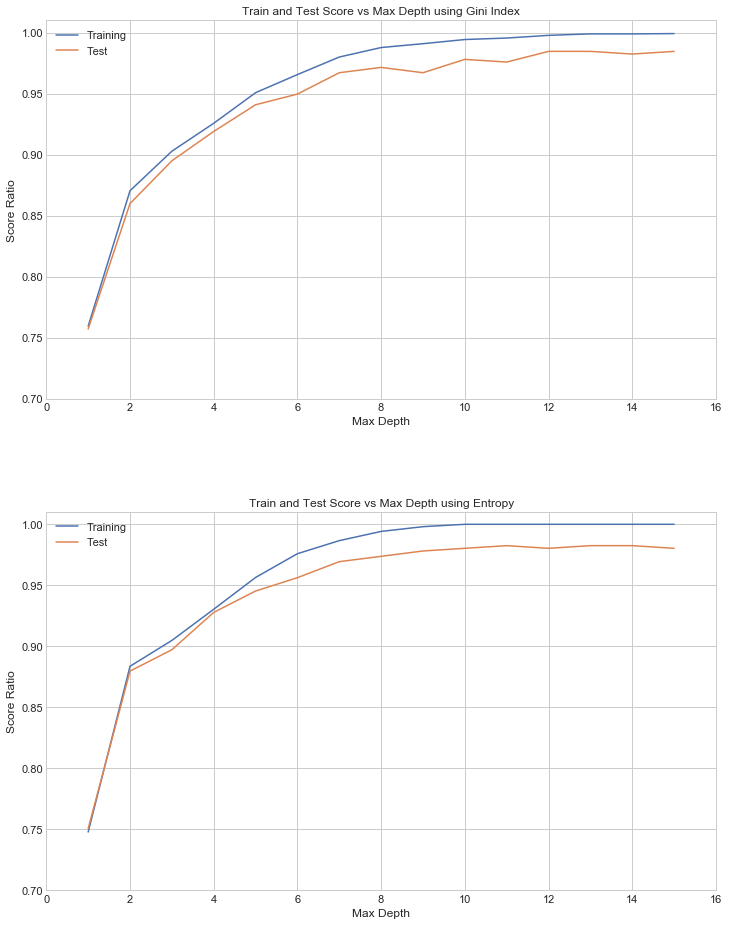

In [46]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(2, figsize=(12, 16))
plt.subplots_adjust(hspace = 0.3)

ax[0].plot(forest_df1['Max Depth'].loc[forest_df1['Criterion'] == 'gini'], forest_df1['Train Score'].loc[forest_df1['Criterion'] == 'gini'])
ax[0].plot(forest_df1['Max Depth'].loc[forest_df1['Criterion'] == 'gini'], forest_df1['Test Score'].loc[forest_df1['Criterion'] == 'gini'])
ax[0].set(xlim=(0, 16), ylim=(0.70, 1.01),xlabel='Max Depth', ylabel='Score Ratio',title=f'Train and Test Score vs Max Depth using Gini Index', xticks=list(range(0,31,2)))
ax[0].legend(['Training', 'Test'])

ax[1].plot(forest_df1['Max Depth'].loc[forest_df1['Criterion'] == 'entropy'], forest_df1['Train Score'].loc[forest_df1['Criterion'] == 'entropy'])
ax[1].plot(forest_df1['Max Depth'].loc[forest_df1['Criterion'] == 'entropy'], forest_df1['Test Score'].loc[forest_df1['Criterion'] == 'entropy'])
ax[1].set(xlim=(0, 16), ylim=(0.70, 1.01),xlabel='Max Depth', ylabel='Score Ratio',title=f'Train and Test Score vs Max Depth using Entropy',xticks=list(range(0,31,2)))
ax[1].legend(['Training', 'Test'])


plt.savefig('Decision Tree Scores.png')
plt.show()

In [47]:
best_forest1 = RandomForestClassifier(criterion='entropy', random_state=0, max_depth=9, n_estimators=100).fit(X1_train, y1_train)
importance1 = best_forest1.feature_importances_
names1 = data_HDI.columns[:-3]
importance_df = pd.DataFrame(data={'Feature name': names1, 'Ratio of importance': importance1}).sort_values(ascending=False, by='Ratio of importance').reset_index(drop=True)

In [48]:
pred1 = best_forest1.predict(X1_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, pred1)))
print('Model Accuracy:', best_forest1.score(X1_test, y1_test))

Mean Absolute Error: 0.02188183807439825
Mean Squared Error: 0.02188183807439825
Root Mean Squared Error: 0.14792510968188682
Model Accuracy: 0.9781181619256017


In [49]:
#https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

class_report = pd.DataFrame(classification_report(y1_test,pred1, output_dict=True)).T
class_report.to_csv('Q1-ClasRepo.csv')
class_report

,f1-score,precision,recall,support
0,0.977011,0.977011,0.977011,87.000000
1,0.982143,0.975177,0.989209,278.000000
2,0.966667,0.988636,0.945652,92.000000
accuracy,0.978118,0.978118,0.978118,0.978118
macro avg,0.975274,0.980275,0.970624,457.000000
weighted avg,0.978050,0.978236,0.978118,457.000000


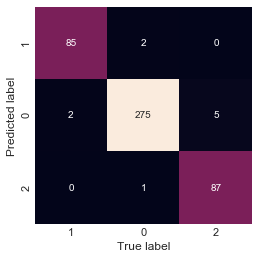

In [50]:
mat = confusion_matrix(y1_test, pred1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = data_HDI['HDI'].unique(),
            yticklabels = data_HDI['HDI'].unique())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('Q1-Conf_Matr.png')
plt.show()

In [51]:
importance_df

,Feature name,Ratio of importance
0,"Mortality rate, neonatal (per 1,000 live births)",0.027874
1,"Mortality rate, adult, male (per 1,000 male ad...",0.024642
2,Adjusted net national income per capita (const...,0.022164
3,Households and NPISHs Final consumption expend...,0.020256
4,Lending interest rate (%),0.020121
5,"Mortality rate, infant (per 1,000 live births)",0.019636
6,GDP growth (annual %),0.018612
7,Access to clean fuels and technologies for coo...,0.018195
8,"GNI per capita, PPP (constant 2011 internation...",0.018028
9,GDP per capita (current LCU),0.016981


In [53]:
top_10 = importance_df.head(10)
top_10.index = range(1,11)
top_10.to_csv('Top_10_features.csv', index=True)
top_10

,Feature name,Ratio of importance
1,"Mortality rate, neonatal (per 1,000 live births)",0.027874
2,"Mortality rate, adult, male (per 1,000 male ad...",0.024642
3,Adjusted net national income per capita (const...,0.022164
4,Households and NPISHs Final consumption expend...,0.020256
5,Lending interest rate (%),0.020121
6,"Mortality rate, infant (per 1,000 live births)",0.019636
7,GDP growth (annual %),0.018612
8,Access to clean fuels and technologies for coo...,0.018195
9,"GNI per capita, PPP (constant 2011 internation...",0.018028
10,GDP per capita (current LCU),0.016981


In [54]:
sum(top_10['Ratio of importance'])

0.2065094507989401

In [55]:
importance_df[importance_df['Ratio of importance'] > 0.001]

,Feature name,Ratio of importance
0,"Mortality rate, neonatal (per 1,000 live births)",0.027874
1,"Mortality rate, adult, male (per 1,000 male ad...",0.024642
2,Adjusted net national income per capita (const...,0.022164
3,Households and NPISHs Final consumption expend...,0.020256
4,Lending interest rate (%),0.020121
5,"Mortality rate, infant (per 1,000 live births)",0.019636
6,GDP growth (annual %),0.018612
7,Access to clean fuels and technologies for coo...,0.018195
8,"GNI per capita, PPP (constant 2011 internation...",0.018028
9,GDP per capita (current LCU),0.016981


In [56]:
gini_importance = importance_df[importance_df['Ratio of importance'] > 0.001]['Feature name']
'GINI index (World Bank estimate)' in gini_importance

False

This is interesting, the GINI index, in other words income inequality, is not a factor at the time of deciding whether a country is developed or not, at least in more than 0.1% compared to other features. Let's see what is the ranking of it in the overall features data frame.

In [57]:
importance_df[importance_df['Feature name'] == 'GINI index (World Bank estimate)']

,Feature name,Ratio of importance
976,GINI index (World Bank estimate),0.000059


This represents 0.0059%. It is a factor in deciding whether a nation is developed or not, but there are at least 976 other factors with more weight than the GINI Index.

In [58]:
my_list = list(map(lambda i: (i,importance_df.reset_index(drop=True)['Ratio of importance'].head(i).sum()),range(100,1300,100)))
num = list(map(lambda feat: feat[0], my_list))
feat = list(map(lambda feat: feat[1], my_list))
feature_importance_df = pd.DataFrame(data = {'Number of Features': num, 'Accumulated Feature Importance': feat})
feature_importance_df.to_csv('Feature_importance.csv', index=False)
feature_importance_df

,Number of Features,Accumulated Feature Importance
0,100,0.692357
1,200,0.798539
2,300,0.854730
3,400,0.893870
4,500,0.923330
5,600,0.947045
6,700,0.965244
7,800,0.978639
8,900,0.988384
9,1000,0.995005


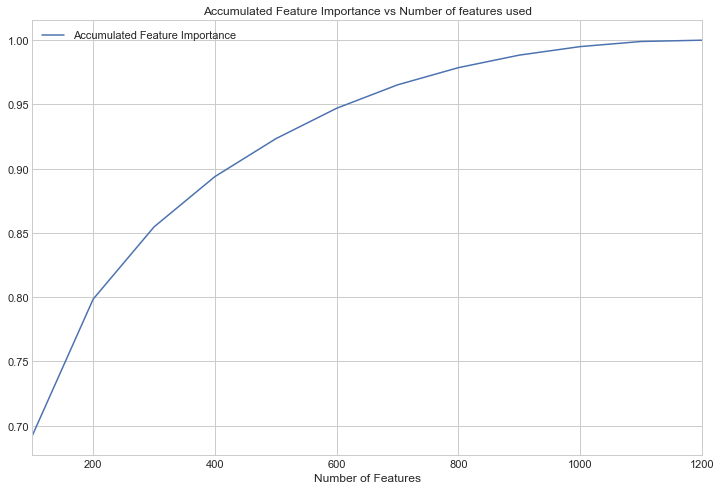

In [59]:
feature_importance_df.plot(x='Number of Features', y = 'Accumulated Feature Importance', title='Accumulated Feature Importance vs Number of features used', figsize = (12,8));


Question 2: GINI INDEX prediction:

For this question the number of features can be reduced in order to only use those which are more relevant according to the random forest. This can help enhance the regression by paying attention to the "Curse of dimensionality".

From the Data Frame and the graph above, it can be seen that by using the most important 300 features, over 85% of the importance is accounted for. So by using these a random forest regressor can be built to predict the GINI Index without taking the HDI into account.

In [60]:
features = importance_df['Feature name'][0:300]

In [61]:
data_GINI = data_HDI[features].copy()
data_GINI['GINI index (World Bank estimate)'] = data_HDI['GINI index (World Bank estimate)']
data_GINI['year'] = data_HDI['year']

In [62]:
validation_2017 = data_GINI[data_GINI['year'] == 2017]
data_GINI = data_GINI[data_GINI['year'] != 2017]


In [63]:
y2 = data_GINI['GINI index (World Bank estimate)']
data_GINI = data_GINI.drop(columns=['GINI index (World Bank estimate)', 'year'])
data_GINI.head()

,"Mortality rate, neonatal (per 1,000 live births)","Mortality rate, adult, male (per 1,000 male adults)",Adjusted net national income per capita (constant 2010 US$),Households and NPISHs Final consumption expenditure (current US$),Lending interest rate (%),"Mortality rate, infant (per 1,000 live births)",GDP growth (annual %),Access to clean fuels and technologies for cooking (% of population),"GNI per capita, PPP (constant 2011 international $)",GDP per capita (current LCU),...,Methane emissions (% change from 1990),CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion),"Industry (including construction), value added per worker (constant 2010 US$)","Employment to population ratio, 15+, female (%) (national estimate)","Railways, passengers carried (million passenger-km)","School enrollment, tertiary (gross), gender parity index (GPI)","Labor force, total",Adjusted savings: carbon dioxide damage (% of GNI),Exports of goods and services (constant 2010 US$),"Multilateral debt service (TDS, current US$)"
0,1.000000,0.485818,0.15773,0.014633,0.004073,0.675894,0.316728,0.6125,0.141351,0.013507,...,0.049624,0.24188,0.08346,0.453676,0.030158,0.053542,0.005067,0.068319,0.043543,0.0
1,0.979339,0.473312,0.15773,0.014633,0.004073,0.654556,0.316728,0.6125,0.141351,0.013507,...,0.040153,0.24188,0.08346,0.453676,0.030158,0.138453,0.005384,0.068319,0.043543,0.0
2,0.960055,0.460805,0.15773,0.014633,0.004073,0.633218,0.316728,0.6125,0.141351,0.013507,...,0.038503,0.24188,0.08346,0.453676,0.030158,0.138453,0.005805,0.068319,0.043543,0.0
3,0.939394,0.453209,0.15773,0.014633,0.004073,0.614187,0.316728,0.6125,0.141351,0.013507,...,0.038969,0.24188,0.08346,0.453676,0.030158,0.138453,0.006272,0.068319,0.043543,0.0
4,0.920110,0.445615,0.15773,0.014633,0.004073,0.596309,0.316728,0.6125,0.141351,0.013507,...,0.039970,0.24188,0.08346,0.453676,0.030158,0.138453,0.006723,0.068319,0.043543,0.0


In [65]:
X2 = data_GINI.values
y2 = y2.values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=0)

In [66]:
regr = RandomForestRegressor(max_depth=9, random_state=0,n_estimators=100)
regr.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [67]:
pred2 = regr.predict(X2_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, pred2)))
print('Model Accuracy:', regr.score(X2_test, y2_test))

Mean Absolute Error: 0.006094211145283478
Mean Squared Error: 0.00020577302977730066
Root Mean Squared Error: 0.014344791032890674
Model Accuracy: 0.9835027563877348


In [70]:
print('2017 Score/Accuracy:', regr.score(validation_2017.iloc[:,:-2], validation_2017.iloc[:,-2]))

2017 Score/Accuracy: 0.9614214751991286
